# Mining the Social Web

## Mining Instagram

This Jupyter Notebook provides an interactive way to follow along with and explore the examples from the video series. The intent behind this notebook is to reinforce the concepts in a fun, convenient, and effective way.

## Instagram API Access

Visit https://www.instagram.com/developer/ and register an application. Next, register a client. After your client has been set up, click on 'Manage' and from the client management page, copy the client ID and client secret, pasting them below.

Next, visit the 'Security' tab and find the redirect URI that was set for your client. If none has been set, set one now. It can be 'http://www.google.com' if you like. Save the redirect URI to the variable below.

Much like Facebook's authentication system, Instagram uses a browser-based authentication system, so the following will be a 2-step process. We need to generate an access token, so we'll construct the URL to visit in a new browser tab so that we can complete the authentication process.

In [ ]:
CLIENT_ID = ''
CLIENT_SECRET = ''

REDIRECT_URI = ''

base_url = 'https://api.instagram.com/oauth/authorize/'

url = '{0}?client_id={1}&redirect_uri={2}&response_type=code&scope=public_content'.format(base_url, CLIENT_ID, REDIRECT_URI)

print('Click the following URL, which will taken you to the REDIRECT_URI you set in creating the APP.')
print('You may need to log into Instagram.')
print()
print(url)

After authorization, copy the string following '`?code=...`' in the browser's address bar.

In [1]:
import requests # pip install requests

CODE = ''

payload = dict(client_id=CLIENT_ID, 
               client_secret=CLIENT_SECRET,
               grant_type='authorization_code',
               redirect_uri=REDIRECT_URI,
               code=CODE)

response = requests.post(
    'https://api.instagram.com/oauth/access_token',
    data = payload)

ACCESS_TOKEN = response.json()['access_token']

NameError: name 'CLIENT_ID' is not defined

In [ ]:
response = requests.get('https://api.instagram.com/v1/users/self/?access_token='+ACCESS_TOKEN)

print(response.text)

## Retrieving Your Feed

In [2]:
from IPython.display import display, Image 

response = requests.get('https://api.instagram.com/v1/users/self/media/recent/?access_token='+ACCESS_TOKEN)
recent_posts = response.json()

def display_image_feed(feed, include_captions=True):
    for post in feed['data']:
        display(Image(url=post['images']['low_resolution']['url']))
        print(post['images']['standard_resolution']['url'])
        if include_captions: print(post['caption']['text'])
        print()


display_image_feed(recent_posts, include_captions=True)

NameError: name 'ACCESS_TOKEN' is not defined

## Retrieving Media by Hashtag

**N.B.:** Regrettably, Instagram has retired the `tags` API endpoint and the following code cell will return an error. We keep it here for reference.

In [ ]:
hashtag = 'travel'
response = requests.get('https://api.instagram.com/v1/tags/'+hashtag+'/media/recent?access_token='+ACCESS_TOKEN)

display_image_feed(response.json(), include_captions=True)

## Anatomy of an Instagram Post

In [3]:
import json

response = requests.get('https://api.instagram.com/v1/users/self/media/recent/?access_token='+ACCESS_TOKEN)
recent_posts = response.json()

print(json.dumps(recent_posts, indent=1))

NameError: name 'ACCESS_TOKEN' is not defined

In [ ]:
print(recent_posts.keys())

In [ ]:
print(recent_posts['pagination'])
print(recent_posts['meta'])

In [ ]:
print(json.dumps(recent_posts['data'], indent=1))

In [ ]:
print(json.dumps(recent_posts['data'][0], indent=1))

## Artificial Neural Networks

Artificial Neural Networks are inspired by the biological neural networks that exist in the nervous systems of many organisms. Neural networks are understood as an information processing system with inputs and outputs. An artificial neural network consists of "layers" of "neurons". Each neuron is defined by an "activation function" that takes multiple inputs, each weighted by some value, and maps them to an output, usually a value between 0 and 1.

The outputs from one layer become the inputs for the next layer. A neural network will have an input layer, where each neuron in the input layer corresponds to a single feature of interest. These could be the pixel values in an image, for instance.

The output layer often consists of neurons with each representing a class. You could create a network with 2 output neurons and the purpose of the network might be to determine whether a photo contains the image of a cat or not. This is a binary classifier. Or, you could have many output neurons, with each output neuron representing a different object that could be present in the image.

Most neural networks also contain one or more "hidden layers" between the input and output layers. The presence of these make the internal workings of the network more opaque to our understanding, but they are vital for detecting complex nonlinear structures that could be present in the input patterns.

A neural network must be "trained" in order for it to have any reasonable degree of accuracy. Training is the process by which the network is shown inputs and the predicted output is compared to some ground truth output. The difference between predicted output and true output represents an error (also called the "loss") to be minimized. Using an algorithm called "backpropagation", these errors are used to update the weights on the inputs for each neuron throughout the network. Through successive iterations, the network can reduce its overall error and improve its accuracy.

There's a lot more nuance to it than is covered here, but there are many good resources online and at O'Reilly Media if you want to go further.

![Artificial Neural Network](resources/ch03-instagram/ann.png)

Schematic diagram of an artificial neural network with 3 input neurons, a hidden layer of 5 neurons, and an output layer of 2 neurons. Image by <a href="//commons.wikimedia.org/wiki/User_talk:Glosser.ca" title="User talk:Glosser.ca">Glosser.ca</a> - <span class="int-own-work" lang="en">Own work</span>, Derivative of <a href="//commons.wikimedia.org/wiki/File:Artificial_neural_network.svg" title="File:Artificial neural network.svg">File:Artificial neural network.svg</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=24913461">Link</a>

In [4]:
# Install scikit-learn and scipy (a dependency) using the command:
# pip install scikit-learn
# pip install scipy
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

# Rescale the data and split into training and test sets
X, y = digits.data / 255., digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print()
print("Training set score: {0}".format(mlp.score(X_train, y_train)))
print("Test set score: {0}".format(mlp.score(X_test, y_test)))

Iteration 1, loss = 2.08212650
Iteration 2, loss = 1.03684958
Iteration 3, loss = 0.46502758
Iteration 4, loss = 0.29285682
Iteration 5, loss = 0.22862621
Iteration 6, loss = 0.18877491
Iteration 7, loss = 0.15163667
Iteration 8, loss = 0.13317189
Iteration 9, loss = 0.11696284
Iteration 10, loss = 0.09268670
Iteration 11, loss = 0.08840361
Iteration 12, loss = 0.08064708
Iteration 13, loss = 0.06800582
Iteration 14, loss = 0.06649765
Iteration 15, loss = 0.05651331
Iteration 16, loss = 0.05649585
Iteration 17, loss = 0.06339016
Iteration 18, loss = 0.06884457
Iteration 19, loss = 0.05704660
Iteration 20, loss = 0.03854956
Iteration 21, loss = 0.04014536
Iteration 22, loss = 0.03665529
Iteration 23, loss = 0.03645015
Iteration 24, loss = 0.03215832
Iteration 25, loss = 0.03771792
Iteration 26, loss = 0.04243158
Iteration 27, loss = 0.03183698
Iteration 28, loss = 0.02469338
Iteration 29, loss = 0.03504355
Iteration 30, loss = 0.04012626
Iteration 31, loss = 0.03171065
Iteration 32, los

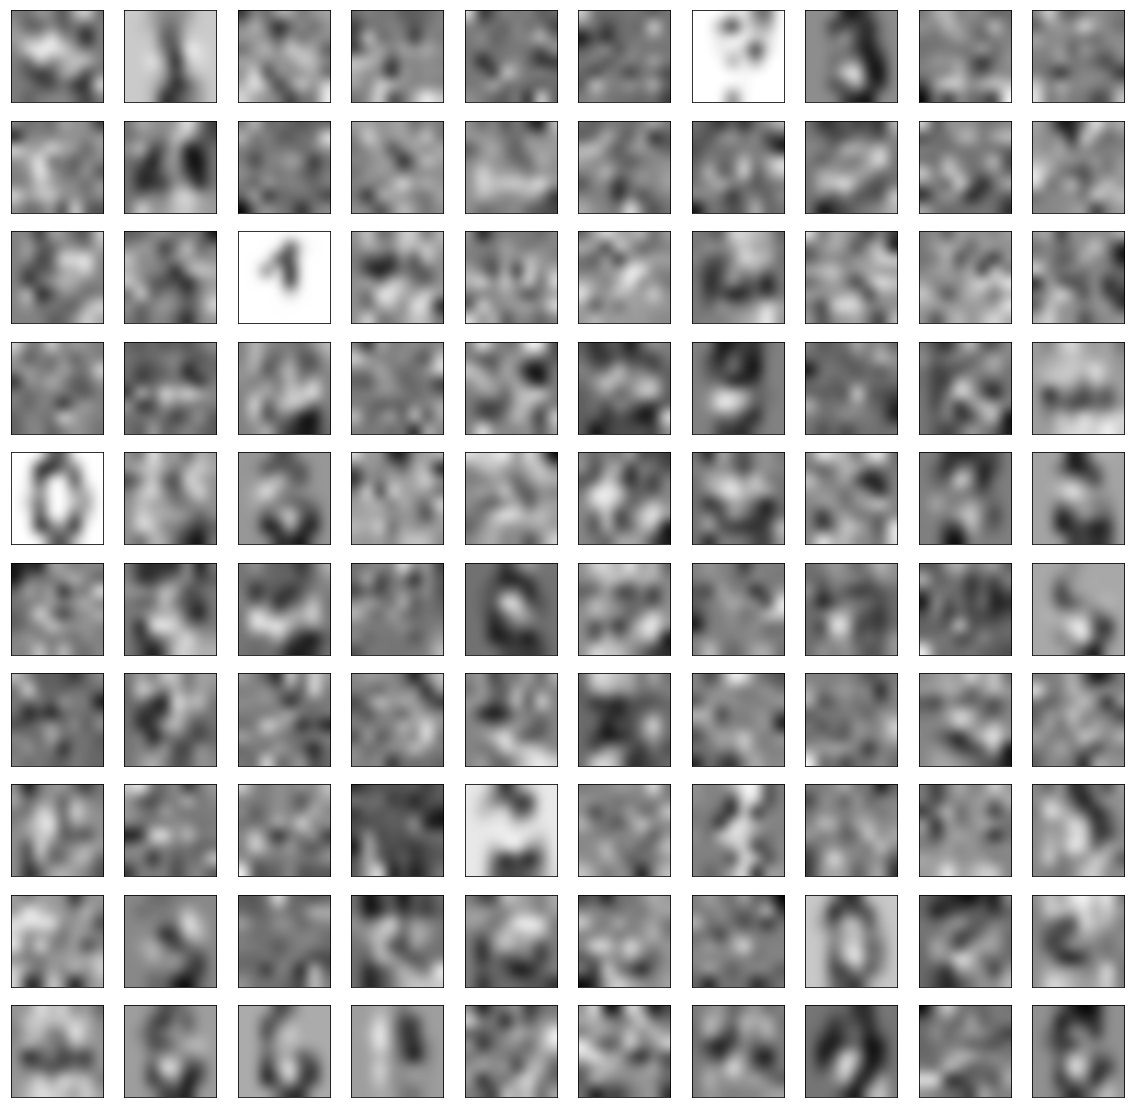

In [5]:
# pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10,10)
fig.set_figwidth(20)
fig.set_figheight(20)

for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, interpolation='bicubic')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

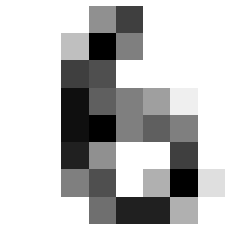

Ground Truth: 6
Predicted: 6


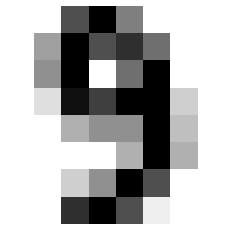

Ground Truth: 9
Predicted: 9


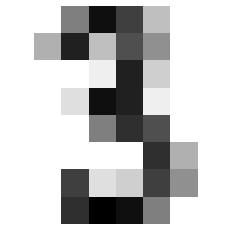

Ground Truth: 3
Predicted: 3


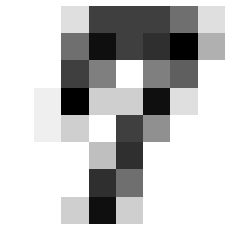

Ground Truth: 7
Predicted: 7


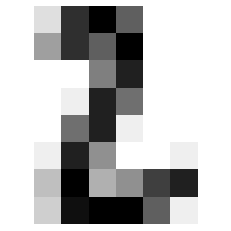

Ground Truth: 2
Predicted: 2


In [6]:
import numpy as np # pip install numpy
predicted = mlp.predict(X_test)

for i in range(5):
    image = np.reshape(X_test[i], (8,8))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.show()
    print('Ground Truth: {0}'.format(y_test[i]))
    print('Predicted: {0}'.format(predicted[i]))

## Learning More

Neural Networks, and (in particular) "deep learning" systems -- which are neural networks with many and complex hidden layers -- are transforming entire industries. What is commonly thought of as "artificial intelligence" today is largely (though not exclusively) the many applications of deep learning systems, which includes machine translation, computer vision, natural language understanding, natural language generation, and many others.

If you would like to take some next steps into understanding how artificial neural networks work, some good online resources include Michael Nielsen book, "Neural Networks and Deep Learning", the first chapter of which is [available online](http://neuralnetworksanddeeplearning.com/chap1.html). Also, check out [Machine Learning for Artists](https://ml4a.github.io/index/), especially the chapter titled "[Looking Inside Neural Networks](https://ml4a.github.io/ml4a/looking_inside_neural_nets/)".

# Object Recognition within Photos using Pretrained Neural Networks

Setting up and training an artificial neural network for object recognition is not a simple task. It requires selecting the right neural network architecture, curating a large collection of pre-labeled images for training the neural network, selecting the right hyperparameters, and then training the network long enough for it to provide accurate results.

Luckily, this work has already been done and the technology has been sufficiently commodified that now anyone has access to near-cutting-edge computer vision APIs.

We are going to use the [Google Vision API](https://cloud.google.com/vision/).

Visit the [Google Developer Console](https://console.cloud.google.com/) and create a project (if you haven't already done so for another video in this series). Then retrieve your OAuth client credentials and paste them below.

**Object Recognition on a Photo of a Cat**

See the [documentation](https://cloud.google.com/vision/docs/python-client-migration) for how to use the Google Cloud Vision Python SDK. We'll go through a few of the basic commands here.

![Cat](resources/ch03-instagram/cat.jpg)

Photograph of a cat in the snow by <a href="//commons.wikimedia.org/wiki/User:Von.grzanka" title="User:Von.grzanka">Von.grzanka</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=9437797">Link</a>

In [7]:
import base64
import urllib
import io
import os
import PIL # pip install Pillow
from IPython.display import display, Image 

GOOGLE_API_KEY = ''

# pip install google-api-python-client
from googleapiclient.discovery import build
service = build('vision', 'v1', developerKey=GOOGLE_API_KEY)

cat = 'resources/ch03-instagram/cat.jpg'

def label_image(path=None, URL=None, max_results=5):
    '''Read an image file (either locally or from the web) and pass the image data
    to Google's Vision API for labelling. Use the URL keyword to pass in the URL
    to an image on the web. Otherwise pass in the path to a local image file.
    Use the max_results keyword to control the number of labels returned by Google's
    Vision API.
    '''
    if URL is not None:
        image_content = base64.b64encode(urllib.request.urlopen(URL).read())
    else:
        image_content = base64.b64encode(open(path, 'rb').read())
    service_request = service.images().annotate(body={
        'requests': [{
            'image': {
                'content': image_content.decode('UTF-8')
            },
            'features': [{
                'type': 'LABEL_DETECTION',
                'maxResults': max_results
            }]
        }]
    })
    labels = service_request.execute()['responses'][0]['labelAnnotations']
    if URL is not None:
        display(Image(url=URL))
    else:
        display(Image(path))
    for label in labels:
        print ('[{0:3.0f}%]: {1}'.format(label['score']*100, label['description']))

    return

# Finally, call the image labeling function on the image of a cat
label_image(cat)

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

## Label my Instagram Feed

In [ ]:
response = requests.get('https://api.instagram.com/v1/users/self/media/recent/?access_token='+ACCESS_TOKEN)
recent_posts = response.json()

for post in recent_posts['data']:
    url = post['images']['low_resolution']['url']
    label_image(URL=url)

## Detecting Faces

In [8]:
from PIL import Image as PImage
from PIL import ImageDraw

def detect_faces(path=None, URL=None):
    '''Read an image file (either locally or from the web) and pass the image data
    to Google's Vision API for face detection. Use the URL keyword to pass in the URL
    to an image on the web. Otherwise pass in the path to a local image file.
    Use the max_results keyword to control the number of labels returned by Google's
    Vision API.
    '''
    if URL is not None:
        image_content = base64.b64encode(urllib.request.urlopen(URL).read())
    else:
        image_content = base64.b64encode(open(path, 'rb').read())
    service_request = service.images().annotate(body={
        'requests': [{
            'image': {
                'content':  image_content.decode('UTF-8')
            },
            'features': [{
                'type': 'FACE_DETECTION',
                'maxResults': 100
            }]
        }]
    })
    try:
        faces = service_request.execute()['responses'][0]['faceAnnotations']
    except:
        # No faces found...
        faces = None
    if URL is not None:
        im = PImage.open(urllib.request.urlopen(URL))
    else:
        im = PImage.open(path)
    draw = ImageDraw.Draw(im)
    
    if faces:
        for face in faces:
            box = [(v.get('x', 0.0), v.get('y', 0.0)) for v in face['fdBoundingPoly']['vertices']]
            draw.line(box + [box[0]], width=5, fill='#ff8888')
    
    display(im)
    return

In [9]:
for post in recent_posts['data']:
    url = post['images']['standard_resolution']['url']
    detect_faces(URL=url)

NameError: name 'recent_posts' is not defined

In [10]:
the_beatles = 'resources/ch03-instagram/the_beatles.jpg'

detect_faces(the_beatles)

NameError: name 'service' is not defined